<a href="https://colab.research.google.com/github/andrejfg/Algoritmos-de-busca/blob/main/Algoritmos%20de%20busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de busca em labirinto

Algoritmos considerados para o labirinto:
* Busca Em Largura
* Busca Em Profundidade
* Busca A*

# Configuração de execução

In [1]:
tamanho_do_labirinto = 10
busca = "Busca Em Largura"
#busca = "Busca Em Profundidade"
#busca = "Busca A*"

# Importações

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation, rc

# Classe Node - Utilizada para busca em grafos com o algoritmo A*

In [3]:
class Node:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.custo = 0
    self.AEstrela = 0


  def getX(self):
    return self.x
  

  def getY(self):
    return self.y

  # Funcoes diretamente utilizadas no A* (INICIO)
  def getCoordenadas(self):
    return (self.x, self.y)
  
  def getCusto(self):
    return self.custo
  

  def setCusto(self, custo):
    self.custo += custo
  

  def calculaFuncaoAEstrela(self, celula, noDestino):
    self.custo = 1+celula.getCusto()
    self.AEstrela = self.custo + self._calculaHeuristica(noDestino)


  def _calculaHeuristica(self, destino):
    return np.abs(self.x-destino.getX()) + np.abs(self.y-destino.getY())

  
  def getAEstrela(self):
    return self.AEstrela
  # Funcoes diretamente utilizadas no A* (INICIO)



  ## Funcoes que nao sao utilizadas diretamente no A*
  def __str__(self):
    return str(self.x) + "-" + str(self.y) + ":" + str(self.AEstrela)

  def __eq__(self, other):
    if self.x==other.getX() and self.y==other.getY():
      return True
    
    return False

  def __repr__(self):
    return str(self)

# Classe labirinto


In [4]:
class Labirinto:
  
  def __init__(self,dim=50):
    
    # Inicializando o labirinto. Nele, vamos considerar que todas as celulas sao paredes
    self.labirintoPlot    =  np.zeros((dim,dim,3), dtype=np.int64)
    self.labirintoArestas =  np.zeros((dim,dim), dtype=np.int64)
    self.dim = dim

    # Selecionar uma celula parede do labirinto como ponto inicial. Com a selecao abaixo,
    # o labirinto sempre tera seu inicio no canto esquerdo do grafico
    posicaoInicial = np.random.randint(0, (dim-1))
    

    fronteira = []
    fronteira.append((posicaoInicial,0))
    dx = [ 0, 1, 0, -1] # Movimentacao de x
    dy = [-1, 0, 1,  0] # movimentacao de y

    while fronteira != []:
      # Transformar a celula (parede) do labirinto em uma celula valida
      (vx, vy) = fronteira[-1] # Selecionando o ultimo elemento da lista
      self.labirintoArestas[vx,vy] = 1
      
      # verificar se a celula (parede) possui somente um vizinho que nao seja parede
      # caso sim, podemos incluir ela como uma passagem.
      vizinhosNaoVisitados=[]

      # Consideramos que a celua tem vizinhos acima, abaixo a esquerda e a direita.
      # Para isso, utilizamos as listas dx e dy para determinar essas posicoes
      for i in range(4):
        nx = vx + dx[i]
        ny = vy + dy[i]

        if nx >=0 and nx < dim and ny >=0 and ny < dim:
          if self.labirintoArestas[nx, ny] == 0:
            
            confereVizinho=0
            for j in range(4):
              ex = nx + dx[j]
              ey = ny + dy[j]

              if ex >=0 and ex < dim and ey >=0 and ey < dim:
                if self.labirintoArestas[ex, ey] == 1:
                  confereVizinho +=1
            
            if confereVizinho == 1:
              vizinhosNaoVisitados.append(i)
      
      if len(vizinhosNaoVisitados) > 0:
        irPara= np.random.choice(vizinhosNaoVisitados)
        vx += dx[irPara]
        vy += dy[irPara]
        fronteira.append((vx,vy))
      else:
        fronteira.pop()
    
    # Ajustar a posicao final (considerando um ponto do lado direito do labirinto)
    encontrou= False
    while not encontrou:
      posicaoFinal = np.random.randint(0,(dim-1))
      if self.labirintoArestas[posicaoFinal, dim-1] ==1:
        encontrou=True
    

    # Colorir Labirinto
    self.labirintoPlot[:,:, 0] += 255* self.labirintoArestas
    self.labirintoPlot[:,:, 1] += 255* self.labirintoArestas
    self.labirintoPlot[:,:, 2] += 255* self.labirintoArestas

    # Colorir posicao inicial e final
    self.labirintoPlot[posicaoInicial,0,1] = 0
    self.labirintoPlot[posicaoInicial,0,2] = 0

    self.labirintoPlot[posicaoFinal,dim-1, 0] = 0
    self.labirintoPlot[posicaoFinal,dim-1, 1] = 0

    # Armazenar no objeto as posicoes inicial e final do labirinto
    self.posicaoInicial = (posicaoInicial,0)
    self.posicaoFinal = (posicaoFinal,dim-1)

  def getLabirintoPlot(self, posicoes=None, cores=(255,0,0)):
    if posicoes==None:
      return self.labirintoPlot

    resposta = self.labirintoPlot.copy()
    for t in posicoes:
      for camada in range(3):
        resposta[t[0],t[1],camada] = cores[camada]
    
    return resposta
  

  def getLabirintoPlotUsandoNodes(self, posicoes=None, cores=(255,0,0)):
    if posicoes==None:
      return self.labirintoPlot

    resposta = self.labirintoPlot.copy()
    for noh in posicoes:
      for camada in range(3):
        resposta[noh.getX(),noh.getY(),camada] = cores[camada]
    
    return resposta


  def getPosicaoInicio(self):
    return self.posicaoInicial


  def getDestino(self):
    return self.posicaoFinal


  def getVizinhos(self, celula):
    dx = [ 0, 1, 0, -1] # Movimentacao de x
    dy = [-1, 0, 1,  0] # movimentacao de y

    vx = celula[0]
    vy = celula[1]
    
    listaVizinhos = []
    for i in range(4):
      nx = vx + dx[i]
      ny = vy + dy[i]

      if nx >=0 and nx < self.dim and ny >=0 and ny < self.dim:
          if self.labirintoArestas[nx, ny] == 1:
            listaVizinhos.append((nx,ny))
    
    return listaVizinhos

# Funções auxiliares. Serão utilizadas para exibição dos nós visitados no labirinto

In [5]:
'''
Funcao auxiliar - registra os caminhos explorados no grafo.
Funcao nao eh eficiente... pode ser melhorada.
'''
def atualizaCaminhos(caminhos, vertice, vizinho):
  naoInserido = True
  for lista in caminhos:
    if lista[-1]==vertice:
      naoInserido=False
      novaLista = lista.copy()
      novaLista.append(vizinho)
      caminhos.append(novaLista)
  
  if naoInserido:
    lista = []
    lista.append(vertice)
    lista.append(vizinho)
    caminhos.append(lista)


'''
  Assim que o objetivo eh encontrado, podemos retornar o caminho explorado ate ele
'''
def selecionaCaminho(caminhos, objetivo):
  for lista in caminhos:
    if lista[-1]==objetivo:
      return lista


'''
  Seleciona a celula de menor valor A* na fronteira
'''
def getMin(fronteira):
  resposta = fronteira[0]
  indice = 0

  for i in range(len(fronteira)):
    if fronteira[i].getAEstrela() < resposta.getAEstrela():
      resposta = fronteira[i]
      indice = i
  
  fronteira.pop(indice)
  return resposta

# Definição dos algoritmos de busca



## Busca em largura

In [6]:
def buscaEmLargura(labirinto):

  fronteira = [] # lista vazia
  caminhos = []
  celulasVisitadas = []
  statusLabirinto = []

  fronteira.append(labirinto.getPosicaoInicio())

  while fronteira != []:
    # Imprime Fronteira
    statusLabirinto.append(labirinto.getLabirintoPlot(posicoes=fronteira, cores=(0,255,127)))

    celula = fronteira.pop(0) # Selecionando o primeiro elemento da lista
    celulasVisitadas.append(celula)
    
    if celula == labirinto.getDestino():
      print("Objetivo", celula, "encontrado")
      caminhoEncontrado = selecionaCaminho(caminhos, labirinto.getDestino())
      statusLabirinto.append(labirinto.getLabirintoPlot(posicoes=caminhoEncontrado, cores=(0,0,255)))
      return statusLabirinto
    else:
      for vizinho in labirinto.getVizinhos(celula):
        if vizinho not in celulasVisitadas:
          atualizaCaminhos(caminhos,celula,vizinho)
          fronteira.append(vizinho)
      
  
  print("Objetivo nao existente no grafo")

## Busca em profundidade

In [7]:
def buscaEmProfundidade(labirinto):

  fronteira = [] # lista vazia
  caminhos = []
  celulasVisitadas = []
  statusLabirinto = []

  fronteira.append(labirinto.getPosicaoInicio())

  while fronteira != []:
    # Imprime Fronteira
    statusLabirinto.append(labirinto.getLabirintoPlot(posicoes=fronteira, cores=(0,255,127)))

    celula = fronteira.pop(0) # Selecionando o primeiro elemento da lista
    celulasVisitadas.append(celula)
    
    if celula == labirinto.getDestino():
      print("Objetivo", celula, "encontrado")
      caminhoEncontrado = selecionaCaminho(caminhos, labirinto.getDestino())
      statusLabirinto.append(labirinto.getLabirintoPlot(posicoes=caminhoEncontrado, cores=(0,0,255)))
      return statusLabirinto
    else:
      for vizinho in labirinto.getVizinhos(celula):
        if vizinho not in celulasVisitadas:
          atualizaCaminhos(caminhos,celula,vizinho)
          fronteira.insert(0,vizinho)
      
  
  print("Objetivo nao existente no grafo")

## A*

In [8]:
def ordenaAEstrela(vizinhanca):
  for i in range(1, len(vizinhanca)):
    vizinho=vizinhanca[i]
    chave = vizinhanca[i].getAEstrela()
    j=i-1
    while j>=0 and chave < vizinhanca[j].getAEstrela():
            vizinhanca[j+1] = vizinhanca[j]
            j-=1
    vizinhanca[j+1]=vizinho


def buscaAEstrela(vizinhanca):
  fronteira= [] # lista vazia
  caminhos = []
  celulasVisitadas = []
  statusLabirinto  = []
  (x,y) = labirinto.getPosicaoInicio()
  noInicial = Node(x,y)

  (x,y) = labirinto.getDestino()
  noDestino = Node(x,y)

  noInicial.calculaFuncaoAEstrela(noInicial, noDestino)
  fronteira.append( noInicial ) # custo do ponto de inicio para ele mesmo

  while fronteira != []:
    statusLabirinto.append(labirinto.getLabirintoPlotUsandoNodes(posicoes=fronteira, cores=(0,255,127)))
    celula = fronteira.pop(0) # Selecionando o primeiro elemento da lista
    celulasVisitadas.append(celula.getCoordenadas())

    if celula.getCoordenadas() == labirinto.getDestino():
        print("Objetivo", celula.getCoordenadas(), "encontrado")
        caminhoEncontrado = selecionaCaminho(caminhos, labirinto.getDestino())
        statusLabirinto.append(labirinto.getLabirintoPlot(posicoes=caminhoEncontrado, cores=(0,0,255)))
        return statusLabirinto
    else:
      vizinhanca = labirinto.getVizinhos(celula.getCoordenadas())
      #transforma todos os vizinhos em Node e calcula o A*
      for i in range(0, len(vizinhanca)):
        vizinhanca[i]=Node(vizinhanca[i][0],vizinhanca[i][1])
        vizinhanca[i].calculaFuncaoAEstrela(vizinhanca[i],noDestino)
      ordenaAEstrela(vizinhanca)
      for vizinho in vizinhanca[::-1]:
        if vizinho.getCoordenadas() not in celulasVisitadas:
          atualizaCaminhos(caminhos,celula.getCoordenadas(),vizinho.getCoordenadas())
          fronteira.insert(0,vizinho)

  
  print("Objetivo nao existente no grafo")

# Execução dos algoritmos de busca

## Criação do objeto labirinto (Escolha do tamanho e exibição do labirinto)

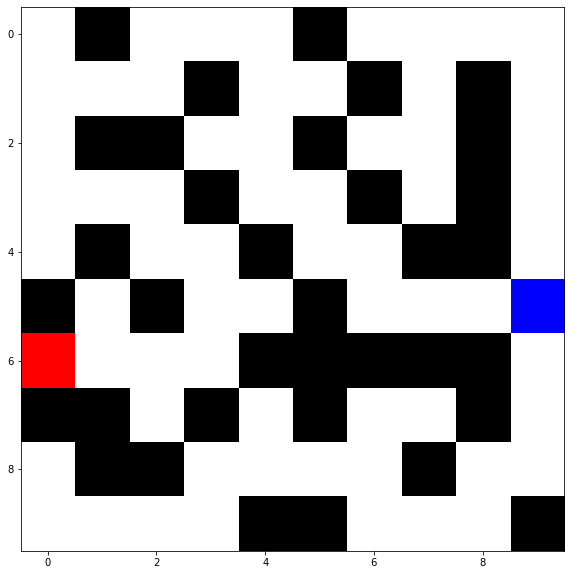

In [9]:
labirinto = Labirinto(tamanho_do_labirinto)

fig = plt.figure(figsize=(tamanho_do_labirinto,tamanho_do_labirinto))
plt.imshow(labirinto.getLabirintoPlot())

## Busca em Largura

In [10]:
if busca == "Busca Em Largura":
  snapshots = buscaEmLargura(labirinto)
elif busca == "Busca Em Profundidade":
  snapshots = buscaEmProfundidade(labirinto)
else:
  snapshots = buscaAEstrela(labirinto)


Objetivo (5, 9) encontrado


# Animando o labirinto
Podemos utilizar os labirintos retornados pelo algoritmo de busca para poder visualizar cada uma das iterações do algoritmo. No momento da busca, estão registrados tanto as fronteiras do algoritmo de busca quanto o resultado final encontrado. 

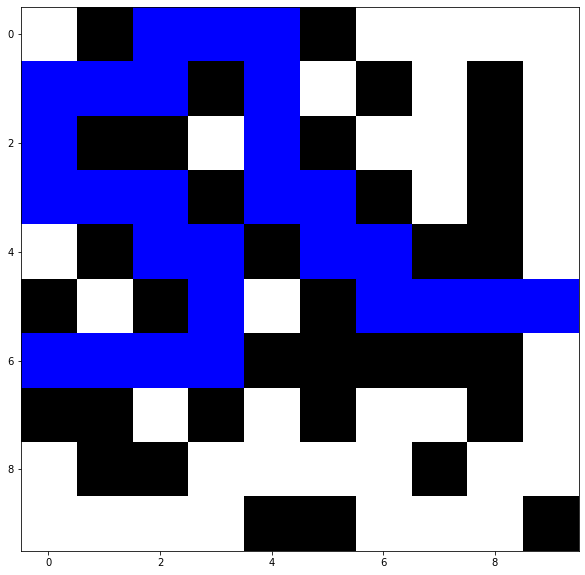

In [15]:
fig = plt.figure(figsize=(10,10))

def init():
  a = labirinto.getLabirintoPlot()
  im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)
  return [im]


def animate_func(i):
  im = plt.imshow(snapshots[i], interpolation='none', aspect='auto', vmin=0, vmax=1)
  return [im]

anim = animation.FuncAnimation(fig,
                               animate_func,
                               init_func=init,
                               frames=len(snapshots), # Numero de frames para animacao
                               interval=100, # Intervalo entre cada frame (em milisegundos)
                               blit=True)
rc('animation', html='jshtml')
anim